In [2]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np

# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# My personal data storaged in my Github repository
rides = pd.read_csv('https://raw.githubusercontent.com/faspy/raw_data/main/trips_data.csv')

In [3]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


In [4]:
rides.shape

(554, 13)

In [5]:
rides.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


In [6]:
rides.rename(columns={'Trip or Order Status': 'status', 'Request Time': 'request_time','Product Type':'product_type','Begin Trip Time':'begin_time',
                      'Begin Trip Lat':'begin_lat','Begin Trip Lng':'begin_lng','Dropoff Time':'dropoff_time','Dropoff Lat':'dropoff_lat',
                      'Dropoff Lng':'dropoff_lng','Distance (miles)':'distance_miles','Fare Amount':'fare_amount',
                      'Fare Currency':'fare_currency','City':'city'}, inplace=True)


                count  mean   std  min  25%   50%   75%   max
distance_miles  544.0   4.1   3.8  0.0  1.2   3.4   6.0  19.7
fare_amount     544.0  15.8  11.6  0.0  7.8  14.4  24.3  58.8


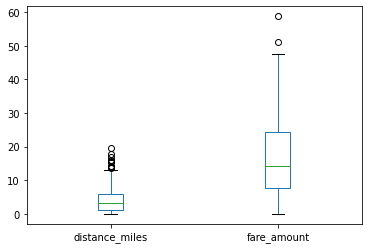

In [7]:
#creating an additional dataframe without Uber EATS records (out of analysis scope)
df1 = rides[rides.product_type!='UberEATS Marketplace'][['distance_miles','fare_amount']]

print(df1.describe().transpose().round(1));
df1.boxplot(grid=False);

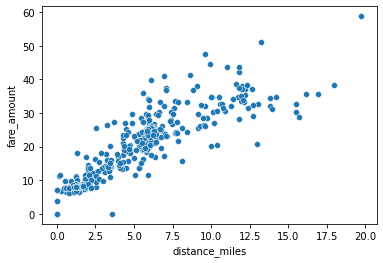

In [8]:
sns.scatterplot(x='distance_miles',y='fare_amount',data=df1);

In [9]:
rides.pop('fare_currency');

In [10]:
rides.isnull().sum().sort_values(ascending=False)

dropoff_lng       29
dropoff_lat       29
begin_lng         29
begin_lat         29
product_type       3
fare_amount        0
distance_miles     0
dropoff_time       0
begin_time         0
request_time       0
status             0
city               0
dtype: int64

In [11]:
rides[rides.product_type.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount
281,458,NaN,UNFULFILLED,2018-05-26 18:36:51 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
362,1449,NaN,UNFULFILLED,2018-02-13 01:59:25 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
392,1449,NaN,UNFULFILLED,2018-01-01 04:44:10 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


Deleted the 3 rows 

In [12]:
rides.dropna(subset = ['product_type'], inplace=True)

In [13]:
rides.shape

(551, 12)

In [14]:
# Checking categories in product_type column
print(rides.product_type.value_counts())

# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}

# New categories replacement
rides['product_type'].replace(product_mapping, inplace=True)

# Checking new categories in product_type column
print(rides.product_type.value_counts())

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL                  5
uberPOOL: MATCHED         5
Pool: MATCHED             4
Black                     3
uberx                     1
Juntos                    1
UberBLACK                 1
Name: product_type, dtype: int64
UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: product_type, dtype: int64


In [15]:
rides = rides[rides.product_type!='UberEATS Marketplace']

In [16]:
rides.status.value_counts()

COMPLETED          444
CANCELED            87
DRIVER_CANCELED     10
Name: status, dtype: int64

convert them into datetime format

In [17]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def date_convertion(df, cols):

  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
    
  return df

# Applying date_convertion function to date features 
rides = date_convertion(rides, ['request_time', 'begin_time', 'dropoff_time'])

In [18]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63


In [19]:
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))

how much is payed by kilometer ridden

In [20]:
rides['distance_km'] = round(rides.distance_miles*1.60934,2)
rides['amount_km'] = round(rides.fare_amount/rides.distance_km,2)

In [21]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,Jan,Wed,22:06,7.79,3.80
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,Jan,Wed,20:21,8.55,2.44
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,Jan,Sun,00:23,9.50,3.60
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,Dec,Fri,00:35,4.09,3.09


how much time (in minutes) I usually waited for Uber cars to arrive at my destination

In [22]:
rides['request_lead_time'] = rides.begin_time - rides.request_time
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

In [23]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,Jan,Wed,22:06,7.79,3.80,4.4
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,Jan,Wed,20:21,8.55,2.44,6.4
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,Jan,Sun,00:23,9.50,3.60,9.6
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85,11.0
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,Dec,Fri,00:35,4.09,3.09,11.0


how much time (in minutes) was spent on each trip

In [24]:
rides['trip_duration'] = rides.dropoff_time - rides.begin_time
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

In [25]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,Jan,Wed,22:06,7.79,3.80,4.4,18.1
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,Jan,Wed,20:21,8.55,2.44,6.4,27.4
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,Jan,Sun,00:23,9.50,3.60,9.6,17.9
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85,11.0,65.2
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,Dec,Fri,00:35,4.09,3.09,11.0,11.2


In [26]:
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),['begin_time','dropoff_time']]= np.nan

In [27]:
completed_rides = rides[(rides.status!='CANCELED')&(rides.status!='DRIVER_CANCELED')] 

Data Analysis & Storytelling: It’s show time!

In [28]:
print('Total trips: ', completed_rides.status.count())

Total trips:  444


How many trips I did over the years?

2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


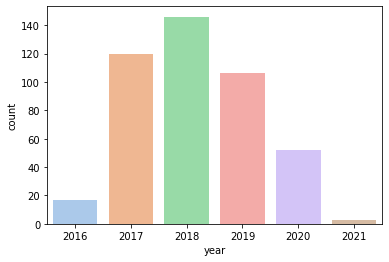

In [29]:
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');

How many trips were completed or canceled?

Total trips:  541
COMPLETED          82.1
CANCELED           16.1
DRIVER_CANCELED     1.8
Name: status, dtype: float64


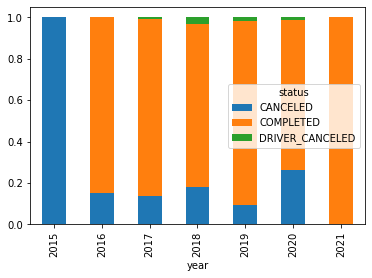

In [30]:
print('Total trips: ', rides.status.count())
print(round(rides.status.value_counts()/rides.status.size*100,1))

#sns.countplot(data=rides, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='status', palette='coolwarm');
rides.groupby(by=['year'])['status'].value_counts(normalize=True).unstack('status').plot.bar(stacked=True);

Where most of the dropoffs ocurred?

In [31]:
import folium
from folium import plugins

coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
  coord.append([lat,lng])

map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)

map.add_child(plugins.HeatMap(coord))
        
map

What product type is usually chosen?

       Total Rides     %
UberX          401  90.3
Pool            39   8.8
Black            4   0.9


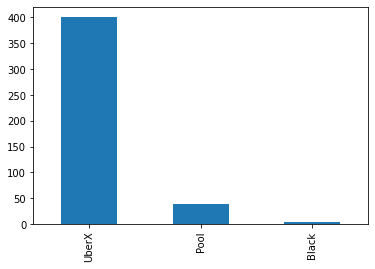

In [32]:
# Creating a serie with product types count
pt_rides = pd.Series(completed_rides.product_type.value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = (completed_rides.product_type.value_counts().sort_index(ascending=False)/completed_rides.product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_rides['product_type'].value_counts().plot(kind='bar');

What is the average fare, distance, amount and time spent on rides?

In [34]:
print('Avg. fare:', round(completed_rides.fare_amount.mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides.fare_amount.sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides.fare_amount.sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

Avg. fare: 19.2 BRL
Avg. distance: 8.1 km
Avg. fare/km: 2.4 BRL/km
Avg. time spent on trips: 21.4 minutes

Total fare amount: 8532.8 BRL
Total distance: 3575.0 km
Total time spent on trips: 158.4 hours


Which weekdays have the highest average fares per km ridden?

In [35]:
#overlapping pivot tables to get weighted average
amount_table = completed_rides.pivot_table(values='fare_amount',aggfunc='sum',columns='weekday', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = amount_table.reindex(column_order, axis=1)

distance_table = completed_rides.pivot_table(values='distance_km',aggfunc='sum',columns='weekday', index='year').round(1)
distance_table = distance_table.reindex(column_order, axis=1)

(amount_table/distance_table).round(1)

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2016,NaN,NaN,2.8,2.4,NaN,2.1,2.9
2017,2.8,2.1,2.4,2.2,2.7,2.1,2.7
2018,2.0,1.9,2.6,2.0,2.2,2.4,2.2
2019,2.5,2.4,2.1,2.3,3.1,2.3,2.7
2020,2.7,2.4,2.7,2.6,2.4,3.1,2.8
2021,NaN,NaN,3.1,NaN,NaN,NaN,3.6


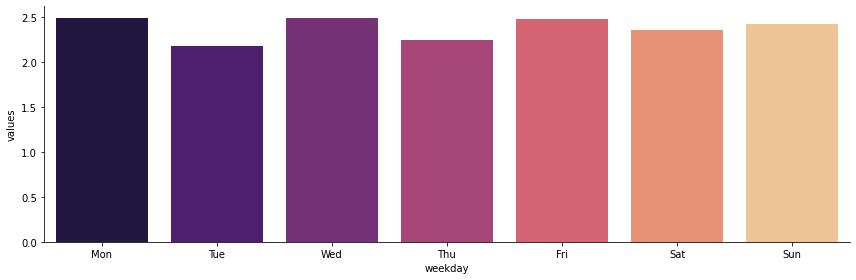

In [36]:

#creating an auxiliar data frame to be displayed in category plot 
aux_serie = round((completed_rides.groupby('weekday')['fare_amount'].sum()/completed_rides.groupby('weekday')['distance_km'].sum()),2)                                                                                                                              
amount_km_df = pd.DataFrame(aux_serie)

amount_km_df = amount_km_df.reset_index()
amount_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)

sns.catplot(x='weekday', y='values', data=amount_km_df, kind='bar', height=4, aspect=3, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma');

Which was the longest/shortest and more expensive/cheaper ride?

In [37]:
rides_distance = completed_rides[completed_rides.distance_km==completed_rides.distance_km.max()]
rides_distance = rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])
rides_distance

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85,11.0,65.2
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,0.15,11.27,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6


What is the average lead time before begining a trip?

In [38]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

4.9 minutes
